<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-22 09:34:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  74.1MB/s    in 2.1s    

2025-03-22 09:34:45 (74.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [12]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


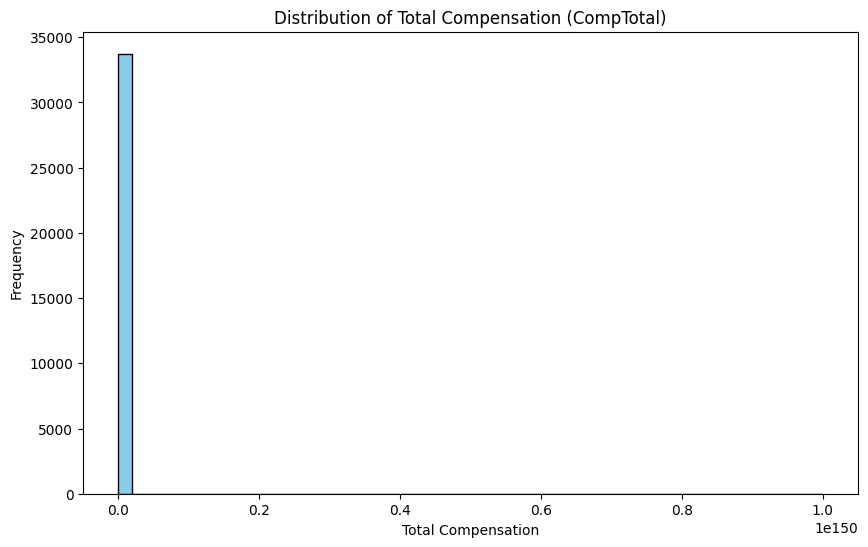

In [10]:
## Write your code here
# Query to get CompTotal data
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""
comp_total_df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(comp_total_df['CompTotal'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


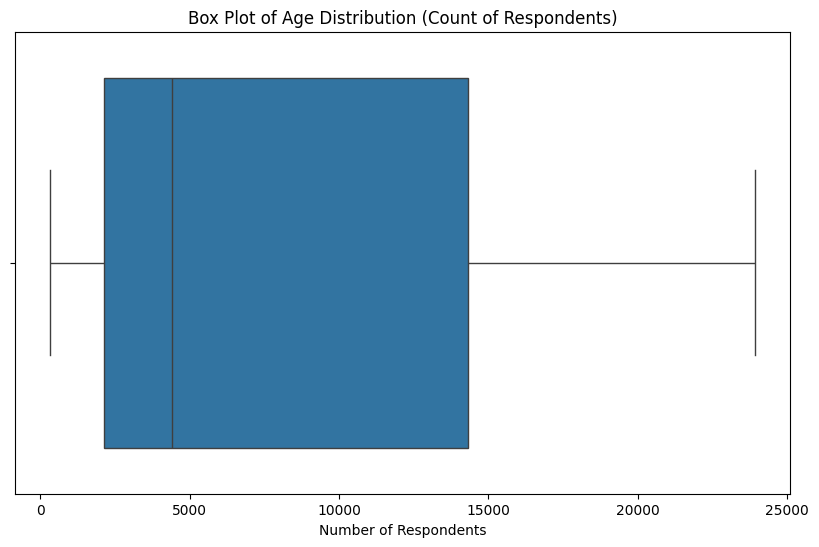

In [13]:
## Write your code here
# Query to get Age data (assuming Age is categorical, we'll count occurrences)
QUERY = """
SELECT Age 
FROM main 
WHERE Age IS NOT NULL
"""
age_df = pd.read_sql_query(QUERY, conn)

# Since Age is categorical, we'll use a box plot alternative: count by category
plt.figure(figsize=(10, 6))
sns.boxplot(x=age_df['Age'].value_counts(), orient='h')
plt.title('Box Plot of Age Distribution (Count of Respondents)')
plt.xlabel('Number of Respondents')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


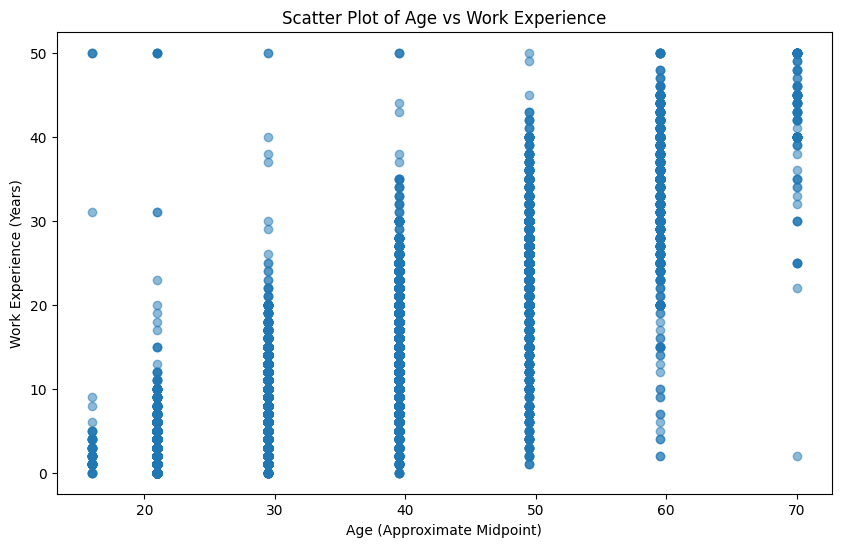

In [14]:
## Write your code here
# Query to get Age and WorkExp data
QUERY = """
SELECT Age, WorkExp 
FROM main 
WHERE WorkExp IS NOT NULL AND Age IS NOT NULL
"""
scatter_df = pd.read_sql_query(QUERY, conn)

# Convert Age to numeric midpoint for plotting (approximation)
age_mapping = {
    'Under 18 years old': 16, '18-24 years old': 21, '25-34 years old': 29.5,
    '35-44 years old': 39.5, '45-54 years old': 49.5, '55-64 years old': 59.5,
    '65 years or older': 70
}
scatter_df['AgeNumeric'] = scatter_df['Age'].map(age_mapping)

# Plot scatter
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['AgeNumeric'], scatter_df['WorkExp'], alpha=0.5)
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age (Approximate Midpoint)')
plt.ylabel('Work Experience (Years)')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


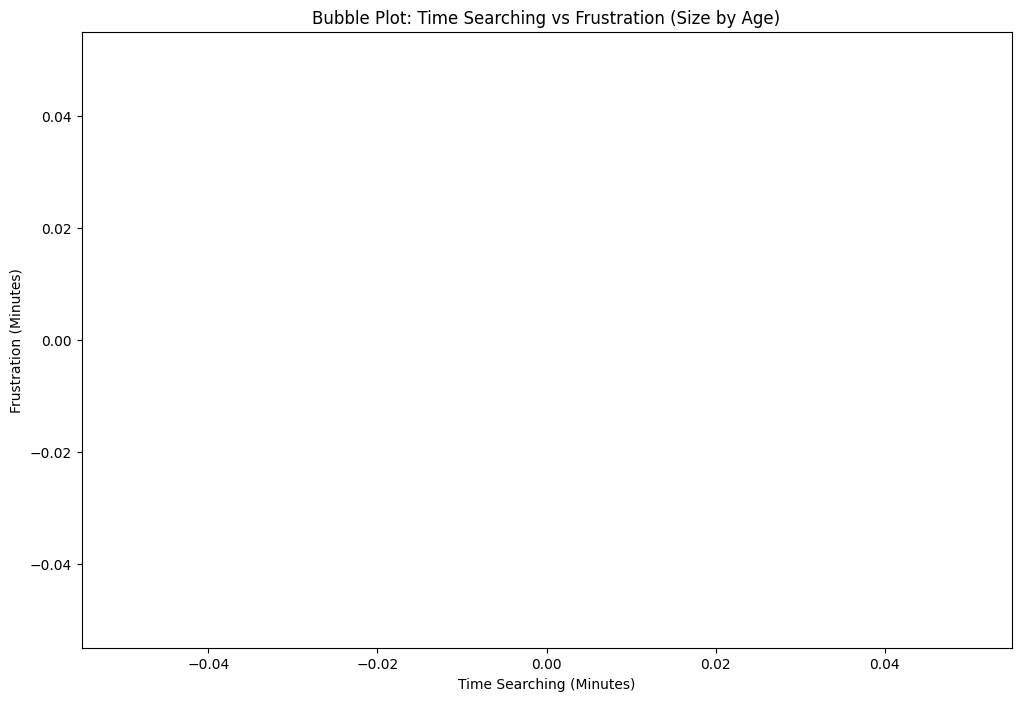

In [21]:
## Write your code here
# Query to get TimeSearching, Frustration, and Age
QUERY = """
SELECT TimeSearching, Frustration, Age 
FROM main 
WHERE TimeSearching IS NOT NULL AND Frustration IS NOT NULL AND Age IS NOT NULL
"""
bubble_df = pd.read_sql_query(QUERY, conn)

# Map categorical TimeSearching and Frustration to numeric for plotting (example mapping)
time_map = {'Less than 15 minutes': 10, '15-30 minutes': 22.5, '30-60 minutes': 45, 
            '1-2 hours': 90, 'Over 2 hours': 150}  # Approximate minutes
bubble_df['TimeSearchingNum'] = bubble_df['TimeSearching'].map(time_map)
bubble_df['FrustrationNum'] = bubble_df['Frustration'].map(time_map)  # Assuming similar categories
bubble_df['AgeSize'] = bubble_df['Age'].map(age_mapping) * 10  # Scale for visibility

# Plot bubble
plt.figure(figsize=(12, 8))
plt.scatter(bubble_df['TimeSearchingNum'], bubble_df['FrustrationNum'], 
            s=bubble_df['AgeSize'], alpha=0.5, c='purple')
plt.title('Bubble Plot: Time Searching vs Frustration (Size by Age)')
plt.xlabel('Time Searching (Minutes)')
plt.ylabel('Frustration (Minutes)')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


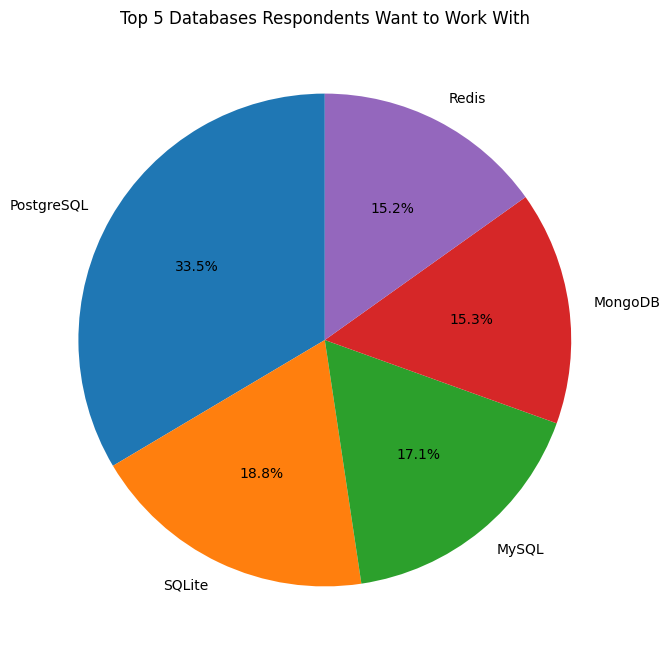

In [16]:
## Write your code here
# Query to get DatabaseWantToWorkWith and split into individual databases
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
db_df = pd.read_sql_query(QUERY, conn)

# Split and count databases
databases = db_df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts()
top_5_databases = databases.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/opt/conda/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


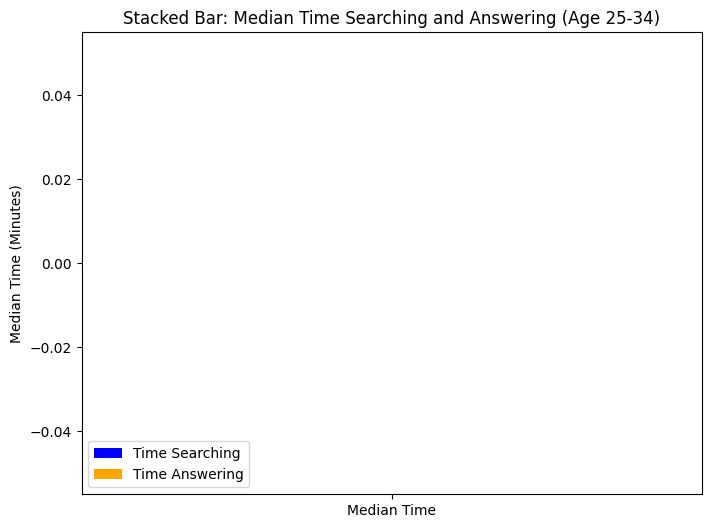

In [17]:
## Write your code here
# Query for TimeSearching and TimeAnswering for age group 25-34 (assuming 30-35 falls here)
QUERY = """
SELECT TimeSearching, TimeAnswering 
FROM main 
WHERE Age = '25-34 years old' 
AND TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL
"""
time_df = pd.read_sql_query(QUERY, conn)

# Map to numeric values (assuming similar categories as above)
time_df['TimeSearchingNum'] = time_df['TimeSearching'].map(time_map)
time_df['TimeAnsweringNum'] = time_df['TimeAnswering'].map(time_map)

# Calculate medians
median_data = {
    'TimeSearching': time_df['TimeSearchingNum'].median(),
    'TimeAnswering': time_df['TimeAnsweringNum'].median()
}

# Plot stacked bar
plt.figure(figsize=(8, 6))
plt.bar(['Median Time'], median_data['TimeSearching'], label='Time Searching', color='blue')
plt.bar(['Median Time'], median_data['TimeAnswering'], bottom=median_data['TimeSearching'], 
        label='Time Answering', color='orange')
plt.title('Stacked Bar: Median Time Searching and Answering (Age 25-34)')
plt.ylabel('Median Time (Minutes)')
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


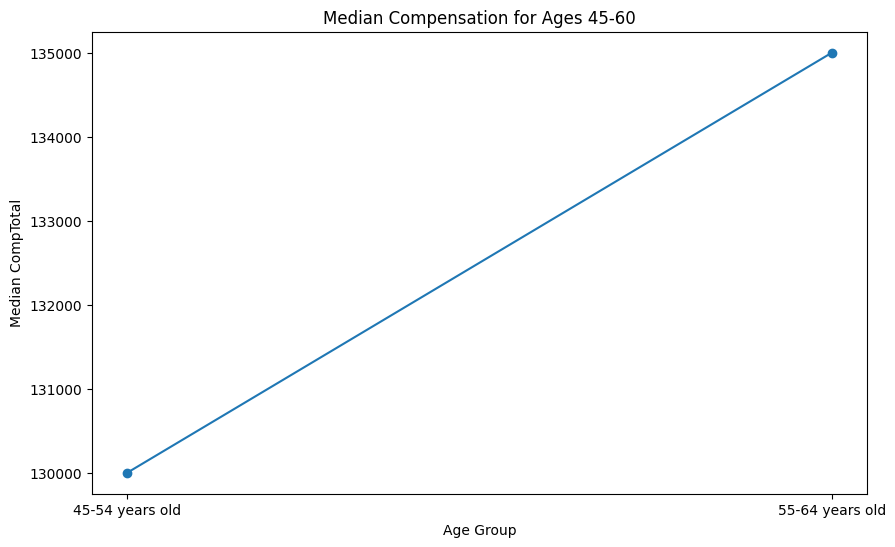

In [18]:
## Write your code here
# Query for CompTotal across ages 45-60
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE Age IN ('45-54 years old', '55-64 years old') 
AND CompTotal IS NOT NULL
"""
comp_age_df = pd.read_sql_query(QUERY, conn)

# Group by Age and calculate median
median_comp = comp_age_df.groupby('Age')['CompTotal'].median()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title('Median Compensation for Ages 45-60')
plt.xlabel('Age Group')
plt.ylabel('Median CompTotal')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


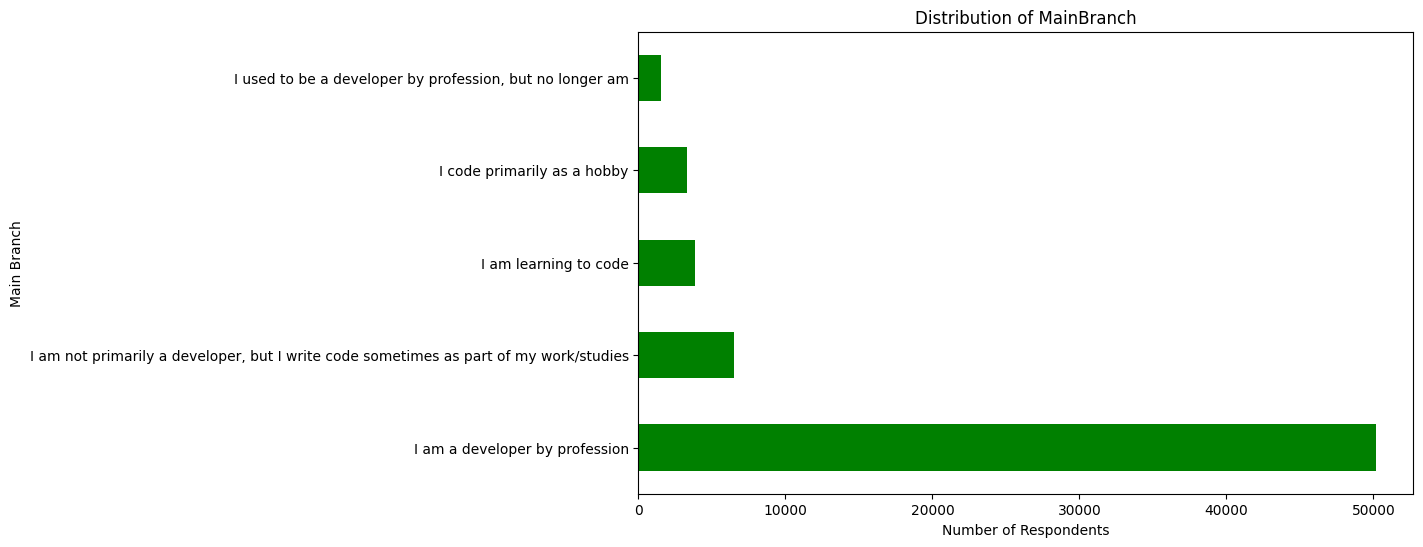

In [19]:
## Write your code here
# Query for MainBranch
QUERY = """
SELECT MainBranch 
FROM main 
WHERE MainBranch IS NOT NULL
"""
branch_df = pd.read_sql_query(QUERY, conn)

# Count occurrences
branch_counts = branch_df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='green')
plt.title('Distribution of MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [22]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
